In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
df = pd.read_csv('train_clean.csv')
df

,date,Value
0,2026-04-01,405.67
1,2035-07-01,423.20
2,2044-12-01,445.10
3,2023-01-01,396.04
4,2027-07-01,406.57
...,...,...
744,2043-08-01,439.02
745,2035-08-01,420.46
746,2048-12-01,455.69
747,2004-10-01,361.59


In [3]:
df = df.sort_values(by='date')
df.index = list(range(len(df)))
df

,date,Value
0,1986-03-01,347.27
1,1986-04-01,349.20
2,1986-05-01,349.26
3,1986-06-01,348.96
4,1986-07-01,347.45
...,...,...
744,2048-08-01,454.06
745,2048-09-01,452.67
746,2048-10-01,452.66
747,2048-11-01,454.43


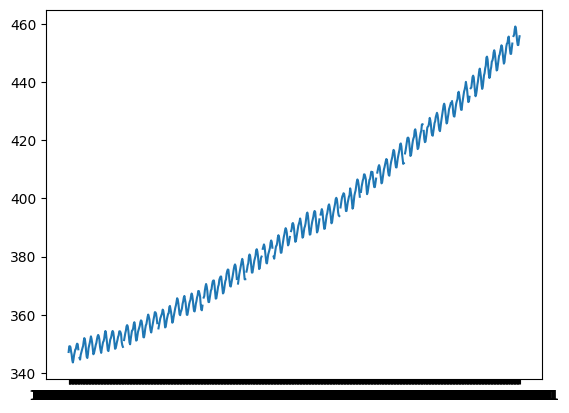

In [4]:
plt.plot(df.date,df.Value)
plt.show()

In [5]:
null_index = np.array(df[df['Value'].isnull()].index)
null_index

array([ 17,  91, 148, 223, 280, 294, 321, 339, 368, 417, 450, 484, 511,
       557, 588, 635, 666, 737], dtype=int64)

In [6]:
null_index

array([ 17,  91, 148, 223, 280, 294, 321, 339, 368, 417, 450, 484, 511,
       557, 588, 635, 666, 737], dtype=int64)

In [7]:
print(df.iloc[null_index[0]-2:null_index[0]+3,1])
(np.mean(df.iloc[null_index[0]-2:null_index[0],1].values) + np.mean(df.iloc[null_index[0]+1:null_index[0]+3,1].values))/2
df.iloc[17-1,1]

15    349.97
16    348.19
17       NaN
18    345.22
19    344.66
Name: Value, dtype: float64


348.19

In [8]:
for ind in null_index:
    df.iloc[ind,1] = (df.iloc[ind-1,1] + df.iloc[ind+1,1])/2
    print(df.iloc[ind,1])
df

346.70500000000004
350.195
356.265
364.565
371.54499999999996
373.555
381.365
381.55499999999995
387.775
393.63
395.42499999999995
401.40999999999997
407.83500000000004
413.77
424.33
433.065
436.37
454.475


,date,Value
0,1986-03-01,347.27
1,1986-04-01,349.20
2,1986-05-01,349.26
3,1986-06-01,348.96
4,1986-07-01,347.45
...,...,...
744,2048-08-01,454.06
745,2048-09-01,452.67
746,2048-10-01,452.66
747,2048-11-01,454.43


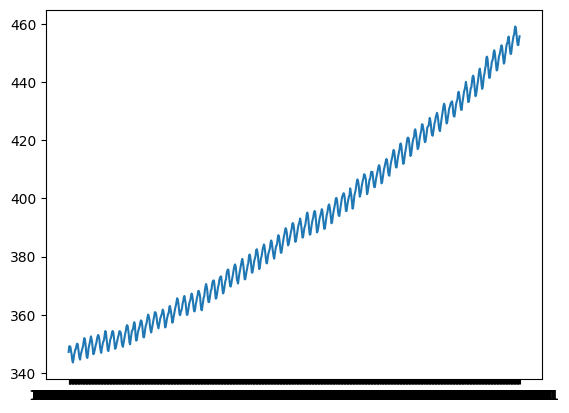

In [9]:
plt.plot(df.date,df.Value)
plt.show()

In [94]:
window = 15
MAX = df['Value'].max()

In [95]:
def Create_data(series,lag):
    start = 0
    end = lag
    X = []
    Y = []
    while(end<len(series)):
        X.append(series[start:end])
        Y.append(series[end])
        start += 1
        end +=1
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(len(X),lag,1)
    return X,Y

In [96]:
X = df['Value'].values
MAX = X.max()
MIN = X.min()
X = (X-MIN)/(MAX-MIN)
X

array([0.03120395, 0.04793274, 0.0484528 , 0.04585247, 0.03276415,
       0.02383635, 0.0073676 , 0.        , 0.00858109, 0.02140938,
       0.03007714, 0.03865823, 0.04030511, 0.05044639, 0.05590708,
       0.05460692, 0.0391783 , 0.02630667, 0.01343504, 0.00858109,
       0.02270954, 0.03007714, 0.03813816, 0.0434255 , 0.04914623,
       0.06292797, 0.07254919, 0.06830198, 0.05486695, 0.03311086,
       0.01664211, 0.01334836, 0.02452977, 0.04255872, 0.05027303,
       0.05824738, 0.06726185, 0.07774985, 0.07003554, 0.05859409,
       0.04160527, 0.0244431 , 0.02747681, 0.03501777, 0.04368553,
       0.05252665, 0.05842073, 0.06916876, 0.07766317, 0.08191038,
       0.07809656, 0.06847534, 0.04741267, 0.03649129, 0.02851695,
       0.04065182, 0.05027303, 0.06015429, 0.06336136, 0.07090231,
       0.08537748, 0.09369854, 0.08633094, 0.06968883, 0.05096646,
       0.0360579 , 0.03397764, 0.04429228, 0.05651383, 0.06812863,
       0.07228916, 0.07922337, 0.08971136, 0.09378521, 0.09023

In [97]:
x_train,y_train = Create_data(X[:600+window],window)
x_test,y_test = Create_data(X[600:],window)

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
len(y_train) + len(y_test)

734

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam

In [101]:
model = Sequential()
model.add(LSTM(256,activation='relu',input_shape=(window,1),return_sequences=False))
model.add(Dense(1,activation='linear'))

model.compile(optimizer=Adam(),loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 264449 (1.01 MB)
Trainable params: 264449 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
epochs=0

In [116]:
epoch=50
model.fit(x_train,y_train,epochs=epoch,validation_data=(x_test,y_test))
epochs += epoch

Epoch 1/50
19/19 [==============================] - 1s 42ms/step - loss: 1.9962e-04 - val_loss: 3.6802e-04
Epoch 2/50
19/19 [==============================] - 1s 41ms/step - loss: 1.2843e-04 - val_loss: 3.1941e-04
Epoch 3/50
19/19 [==============================] - 1s 41ms/step - loss: 7.7990e-05 - val_loss: 1.4867e-04
Epoch 4/50
19/19 [==============================] - 1s 56ms/step - loss: 8.6502e-05 - val_loss: 1.4677e-04
Epoch 5/50
19/19 [==============================] - 1s 48ms/step - loss: 7.9671e-05 - val_loss: 1.4675e-04
Epoch 6/50
19/19 [==============================] - 1s 44ms/step - loss: 7.0512e-05 - val_loss: 1.2272e-04
Epoch 7/50
19/19 [==============================] - 1s 42ms/step - loss: 6.9687e-05 - val_loss: 2.5544e-04
Epoch 8/50
19/19 [==============================] - 1s 51ms/step - loss: 9.0685e-05 - val_loss: 2.3991e-04
Epoch 9/50
19/19 [==============================] - 1s 63ms/step - loss: 1.1838e-04 - val_loss: 1.5151e-04
Epoch 10/50
19/19 [==================

In [117]:
epochs

100

In [118]:
y_pred = model.predict(x_test).reshape(-1,)
y_pred

5/5 [==============================] - 0s 13ms/step


array([0.6957784 , 0.69202596, 0.6936653 , 0.7019057 , 0.71450645,
       0.72776717, 0.74015707, 0.7497256 , 0.7522139 , 0.74672675,
       0.73321044, 0.72080797, 0.7125491 , 0.70927644, 0.7125011 ,
       0.72280574, 0.73706335, 0.7521526 , 0.76460475, 0.7729077 ,
       0.7733809 , 0.7645111 , 0.7528163 , 0.7428376 , 0.7364859 ,
       0.7338131 , 0.7356077 , 0.74255913, 0.7534151 , 0.76634616,
       0.7776554 , 0.78664446, 0.7887178 , 0.7836083 , 0.77191645,
       0.76178724, 0.7554956 , 0.75197816, 0.75268155, 0.761947  ,
       0.7759797 , 0.7895519 , 0.80283135, 0.81167823, 0.81306607,
       0.80748874, 0.7950953 , 0.7852842 , 0.7786892 , 0.77586776,
       0.77761   , 0.7858347 , 0.80019265, 0.81422275, 0.8267813 ,
       0.8370673 , 0.8406915 , 0.83468914, 0.82304364, 0.81122136,
       0.80282927, 0.7962186 , 0.79756314, 0.8062762 , 0.8209906 ,
       0.8362595 , 0.8515418 , 0.8628492 , 0.865104  , 0.8555751 ,
       0.83993965, 0.8240747 , 0.8148637 , 0.81490016, 0.82415

In [119]:
np.sqrt(MSE(y_test,y_pred))*MAX

5.867540299137011

In [120]:
y_test

array([0.69151426, 0.68848054, 0.70364913, 0.71699749, 0.72921903,
       0.74352085, 0.75270868, 0.76510358, 0.77021756, 0.7623299 ,
       0.74352085, 0.72566525, 0.71127676, 0.71509058, 0.72887232,
       0.73953367, 0.75392216, 0.7592095 , 0.76631707, 0.7723845 ,
       0.77485481, 0.77732513, 0.76553697, 0.74274075, 0.73277282,
       0.73190604, 0.74421427, 0.75929618, 0.77117101, 0.77810523,
       0.78339256, 0.80046806, 0.80566872, 0.79596082, 0.78313253,
       0.76432348, 0.75218861, 0.75175522, 0.77013088, 0.78321921,
       0.79474733, 0.80662217, 0.81268961, 0.82196412, 0.83513912,
       0.82361099, 0.81121609, 0.7910202 , 0.77507151, 0.77680506,
       0.79076016, 0.80350178, 0.81624339, 0.81849701, 0.83409899,
       0.84935425, 0.85368813, 0.84857415, 0.82803155, 0.80809569,
       0.79240704, 0.7983878 , 0.81017596, 0.82621132, 0.83669932,
       0.85152119, 0.86677646, 0.87457745, 0.86330935, 0.84892086,
       0.82647135, 0.81416313, 0.82057727, 0.83756609, 0.85464

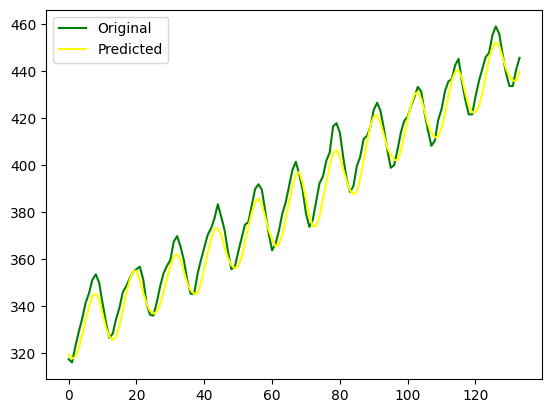

In [121]:
plt.plot(range(len(y_test)),y_test*MAX,color='green',label='Original')
plt.plot(range(len(y_pred)),y_pred*MAX,color='yellow',label='Predicted')
plt.legend()
plt.show()

In [122]:
pred=model.predict(x_train).reshape(-1,)

19/19 [==============================] - 0s 14ms/step


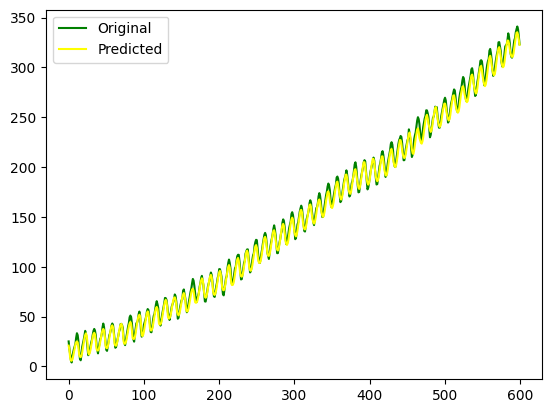

In [123]:
plt.plot(range(len(y_train)),y_train*MAX,color='green',label='Original')
plt.plot(range(len(pred)),pred*MAX,color='yellow',label='Predicted')
plt.legend()
plt.show()

In [27]:
class Predict:
    def __init__(self,window:int,prev_data:np.ndarray,model):
        self.__prev_data = list(prev_data)
        self.predictions = []
        self.__model = model
    def predict(self,num_prediction:int):
        del self.predictions
        self.predictions = []
        for _ in range(num_prediction):
            print(self.__prev_data)
            pred = self.__model.predict(np.array(self.__prev_data).reshape(1,window,1)).reshape(-1,)
            print(pred)
            self.predictions.append(pred[0])
            self.__prev_data.append(pred[0])
            self.__prev_data.pop(0)

In [124]:
ob = Predict(window=window,prev_data=df.Value.values[-window:]/MAX,model=model)

In [125]:
ob.predict(24)

[0.9795006971070058, 0.9836397699546879, 0.987234227953991, 0.9900553328685954, 0.9928764377831997, 0.9938349599163471, 0.9979522481700941, 1.0, 0.9983008016730568, 0.9935517601951899, 0.9891512722202858, 0.9861232136632974, 0.9861014290693622, 0.9899573021958871, 0.9927021610317183]
1/1 [==============================] - 0s 26ms/step
[1.0043436]
[0.9836397699546879, 0.987234227953991, 0.9900553328685954, 0.9928764377831997, 0.9938349599163471, 0.9979522481700941, 1.0, 0.9983008016730568, 0.9935517601951899, 0.9891512722202858, 0.9861232136632974, 0.9861014290693622, 0.9899573021958871, 0.9927021610317183, 1.0043436]
1/1 [==============================] - 0s 26ms/step
[1.0101509]
[0.987234227953991, 0.9900553328685954, 0.9928764377831997, 0.9938349599163471, 0.9979522481700941, 1.0, 0.9983008016730568, 0.9935517601951899, 0.9891512722202858, 0.9861232136632974, 0.9861014290693622, 0.9899573021958871, 0.9927021610317183, 1.0043436, 1.0101509]
1/1 [==============================] - 0s 25

In [126]:
ob.predictions

[1.0043436,
 1.0101509,
 1.015535,
 1.0194348,
 1.0213295,
 1.0206378,
 1.0184122,
 1.0153229,
 1.012057,
 1.0116113,
 1.013361,
 1.0172501,
 1.0227898,
 1.0291654,
 1.0352322,
 1.0404791,
 1.0438216,
 1.0450035,
 1.044491,
 1.0428542,
 1.0409868,
 1.0400106,
 1.0405781,
 1.0429878]

In [127]:
predicted = np.array(ob.predictions)*MAX
predicted

array([461.0339 , 463.69968, 466.1712 , 467.96136, 468.83112, 468.51355,
       467.49197, 466.07385, 464.57462, 464.3701 , 465.17322, 466.95847,
       469.50146, 472.4281 , 475.21298, 477.62152, 479.15585, 479.69843,
       479.4632 , 478.7118 , 477.85458, 477.40646, 477.667  , 478.77313],
      dtype=float32)

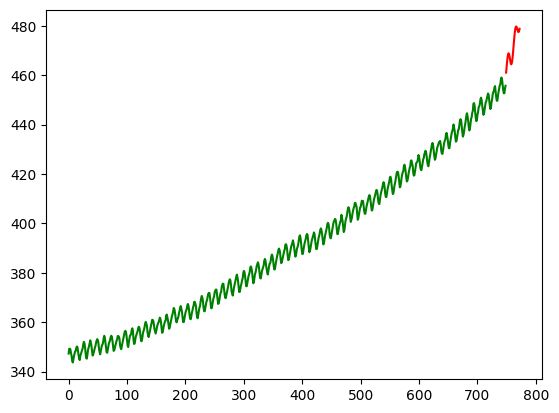

In [128]:
plt.plot(range(len(df)),df.Value,color='green')
plt.plot(range(len(df),len(df)+len(predicted+1)),predicted,color='red')

# Arima

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [13]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,val in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = val
    return dfoutput

In [15]:
R = adf_test(df['Value'])
R

Test Statistic                   5.125661
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    733.000000
Critical Value 1%               -3.439303
Critical Value 5%               -2.865491
Critical Value 10%              -2.568874
dtype: float64

In [16]:
R['Test Statistic'] < R['Critical Value 5%']

False

In [17]:
def kpss_test(timeseries):
    dftest = kpss(timeseries,regression='C')
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,val in dftest[3].items():
        dfoutput[f'Critical Value {key}'] = val
    return dfoutput

In [18]:
R = kpss_test(df['Value'])
R

C:\Users\idipa\AppData\Local\Temp\ipykernel_13484\242090365.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest = kpss(timeseries,regression='C')


Test Statistic          4.199551
p-value                 0.010000
#Lags Used             17.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64

In [19]:
R['Test Statistic'] < R['Critical Value 5%']

False

The Series is not Stationary

In [54]:
L = (df['Value']-df['Value'].shift(2))
L.dropna(inplace=True)
L

2      1.99
3     -0.24
4     -1.81
5     -2.54
6     -2.93
       ... 
744   -4.20
745   -3.41
746   -1.40
747    1.76
748    3.03
Name: Value, Length: 747, dtype: float64

<Axes: >

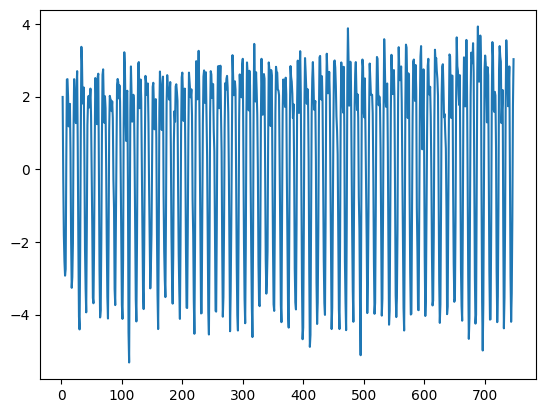

In [55]:
L.plot()

In [56]:
R = adf_test(L)
R

Test Statistic                  -5.114609
p-value                          0.000013
#Lags Used                      19.000000
Number of Observations Used    727.000000
Critical Value 1%               -3.439377
Critical Value 5%               -2.865524
Critical Value 10%              -2.568891
dtype: float64

In [57]:
R['Test Statistic'] < R['Critical Value 5%']

True

In [58]:
R = kpss_test(L)
R

C:\Users\idipa\AppData\Local\Temp\ipykernel_13484\242090365.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest = kpss(timeseries,regression='C')


Test Statistic          0.782424
p-value                 0.010000
#Lags Used             12.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64

In [59]:
R['Test Statistic'] < R['Critical Value 5%']

False

L is stationary

d = 1 is enough

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

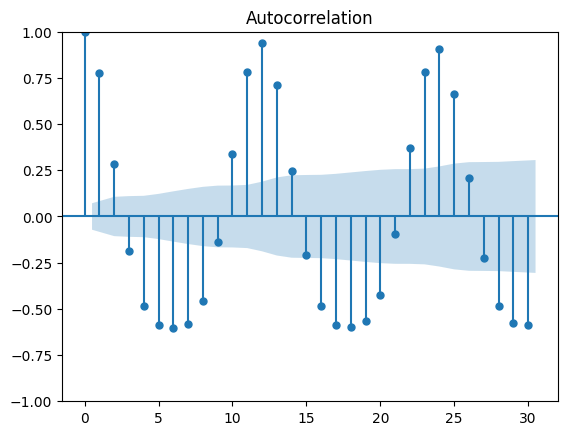

In [96]:

fig = plot_acf(L,lags=30)


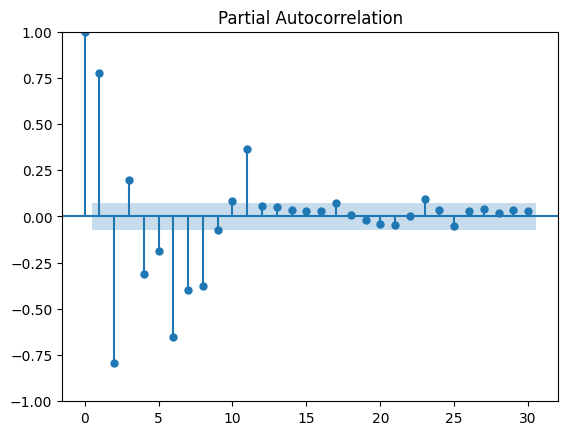

In [81]:
fig = plot_pacf(L,lags=30)

In [35]:
x_train = df.Value[:600]
x_test = df.Value[600:]

In [111]:
model = ARIMA(x_train,order=(19,2,14))
model = model.fit()
model.summary()

C:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  600
Model:               ARIMA(19, 2, 14)   Log Likelihood                -333.690
Date:                Tue, 10 Oct 2023   AIC                            735.381
Time:                        02:22:07   BIC                            884.763
Sample:                             0   HQIC                           793.541
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3017      0.460     -2.832      0.005      -2.203      -0.401
ar.L2         -0.8439      0.320     -2.635      0.008      -1.472      -0.216
ar.L3         -0.1698      0.313     -0.543      0.587      -0.783       0.443
ar.L4          0.0374      0.264      0.142      0.887      -0.480       0.555
ar.L5         -0.2006      0.261     -0.769      0.442      -0.712       0.311
ar.L6         -0.1831      0.264     -0.694      0.488      -0.700       0.334
ar.L7          0.0640      0.258      0.249      0.804      -0.441       0.569
ar.L8         -0.1637      0.241     -0.680      0.496      -0.635       0.308
ar.L9         -0.5531      0.227     -2.438      0.015      -0.998      -0.108
ar.L10        -0.5057      0.312     -1.620      0.105      -1.117       0.106
ar.L11         0.0615      0.224      0.274      0.784      -0.378       0.501
ar.L12         0.7369      0.222      3.322      0.001       0.302       1.172
ar.L13         0.8127      0.336      2.417      0.016       0.154       1.472
ar.L14         0.2937      0.190      1.543      0.123      -0.079       0.667
ar.L15         0.0892      0.199      0.448      0.654      -0.301       0.479
ar.L16        -0.2165      0.185     -1.168      0.243      -0.580       0.147
ar.L17        -0.3433      0.198     -1.732      0.083      -0.732       0.045
ar.L18        -0.2903      0.164     -1.770      0.077      -0.612       0.031
ar.L19        -0.1395      0.109     -1.284      0.199      -0.352       0.073
ma.L1          0.2142      0.456      0.470      0.638      -0.679       1.108
ma.L2         -0.6577      0.367     -1.792      0.073      -1.377       0.061
ma.L3         -0.9262      0.271     -3.424      0.001      -1.456      -0.396
ma.L4         -0.2520      0.468     -0.538      0.590      -1.169       0.665
ma.L5          0.4618      0.399      1.157      0.247      -0.320       1.244
ma.L6          0.2465      0.328      0.751      0.453      -0.397       0.890
ma.L7         -0.2756      0.291     -0.947      0.343      -0.846       0.295
ma.L8          0.0701      0.322      0.218      0.828      -0.561       0.702
ma.L9          0.4285      0.253      1.691      0.091      -0.068       0.925
ma.L10         0.1398      0.260      0.537      0.591      -0.370       0.650
ma.L11        -0.3603      0.221     -1.627      0.104      -0.794       0.074
ma.L12        -0.4384      0.165     -2.661      0.008      -0.761      -0.116
ma.L13        -0.0636      0.223     -0.285      0.776      -0.501       0.374
ma.L14         0.4496      0.205      2.198      0.028       0.049       0.851
sigma2         0.1701      0.009     18.403      0.000       0.152       0.188
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                66.13
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                

In [107]:
start = len(x_train)
end = len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

600    427.065006
601    425.320365
602    422.609635
603    421.357239
604    421.933092
          ...    
744    452.211535
745    450.250038
746    448.729687
747    448.474979
748    449.454036
Name: predicted_mean, Length: 149, dtype: float64

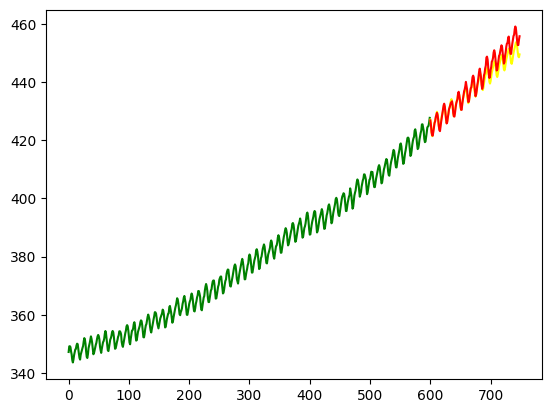

In [108]:
plt.plot(range(len(x_train)),x_train,color='green',label='train')
plt.plot(range(len(x_train),len(x_train)+len(x_test)),pred,color='yellow')
plt.plot(range(len(x_train),len(x_train)+len(x_test)),x_test,color='red')

In [109]:
np.sqrt(sum((pred.values-x_test.values)**2))

29.530353872485748

In [98]:
from pmdarima import auto_arima

In [99]:
stepwise_fit = auto_arima(x_train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1288.194, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2046.668, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1647.067, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1696.940, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2050.725, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1516.622, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1287.911, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1572.637, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1494.117, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1288.574, Time=0.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1433.115, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1289.900, Time=0.82 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1362.950, Time=0.07 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 2.811 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -638.956
Date:                Tue, 10 Oct 2023   AIC                           1287.911
Time:                        02:18:16   BIC                           1309.888
Sample:                             0   HQIC                          1296.467
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0396      0.004     10.760      0.000       0.032       0.047
ar.L1          1.5462      0.023     68.531      0.000       1.502       1.590
ar.L2         -0.8483      0.025    -33.691      0.000      -0.898      -0.799
ma.L1         -0.9129      0.019    -48.452      0.000      -0.950      -0.876
sigma2         0.4918      0.027     18.194      0.000       0.439       0.545
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                13.92
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             0.33
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""